## Question 1: Do the market basket analysis with Bread_Basket dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
data=pd.read_csv('D:/Letsupgrade_AIML/Datasets/Materials/BreadBasket_DMS - Arindam Dev.csv')
data.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [4]:
data.shape

(21293, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 415.9+ KB


In [6]:
#checking the missing values in data
data.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [7]:
data.isna().any()

Date           False
Time           False
Transaction    False
Item           False
dtype: bool

In [8]:
data.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [9]:
data.nunique()

Date            159
Time           8240
Transaction    9531
Item             95
dtype: int64

### Data Preprocessing

In [10]:
data['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [11]:
data.loc[data['Item']=='NONE']

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE


### Drop the data of rows which contains Item as 'NONE'

In [13]:
data.drop(data[data['Item']=='NONE'].index,inplace=True)
data.nunique()

Date            159
Time           8197
Transaction    9465
Item             94
dtype: int64

In [14]:
data['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

### By the above unique items, 'NONE' item which is denoting no item description, that has been removed by using drop function

In [15]:
data.shape

(20507, 4)

### Feature Engineering-> In this adding columns of the month,year from Date column and hour from Time column

In [16]:
data['Date']=pd.to_datetime(data['Date'])

In [17]:
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month

In [18]:
data['Time']=pd.to_datetime(data['Time'])

In [19]:
data['Hour']=data['Time'].dt.hour

In [20]:
data.head(10)

,Date,Time,Transaction,Item,Year,Month,Hour
0,2016-10-30,2020-11-02 09:58:11,1,Bread,2016,10,9
1,2016-10-30,2020-11-02 10:05:34,2,Scandinavian,2016,10,10
2,2016-10-30,2020-11-02 10:05:34,2,Scandinavian,2016,10,10
3,2016-10-30,2020-11-02 10:07:57,3,Hot chocolate,2016,10,10
4,2016-10-30,2020-11-02 10:07:57,3,Jam,2016,10,10
5,2016-10-30,2020-11-02 10:07:57,3,Cookies,2016,10,10
6,2016-10-30,2020-11-02 10:08:41,4,Muffin,2016,10,10
7,2016-10-30,2020-11-02 10:13:03,5,Coffee,2016,10,10
8,2016-10-30,2020-11-02 10:13:03,5,Pastry,2016,10,10
9,2016-10-30,2020-11-02 10:13:03,5,Bread,2016,10,10


<AxesSubplot:xlabel='Item', ylabel='count'>

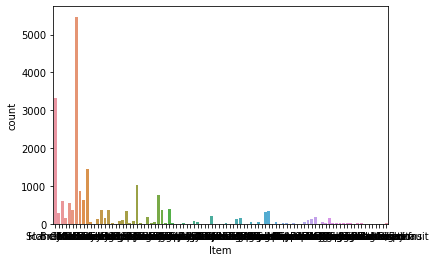

In [21]:
# By using count plot we can view the counts of different  Items
sns.countplot(x='Item',data=data)

In [22]:
# count of different items, arranging from highest to lowest
itemsold_data=data['Item'].value_counts().sort_values(ascending=False)
itemsold_data

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Raw bars             1
Adjustment           1
Olum & polenta       1
Bacon                1
Polenta              1
Name: Item, Length: 94, dtype: int64

In [23]:
itemsold_data=pd.DataFrame(itemsold_data,columns=["Item"])
itemsold_data.head()

,Item
Coffee,5471
Bread,3325
Tea,1435
Cake,1025
Pastry,856


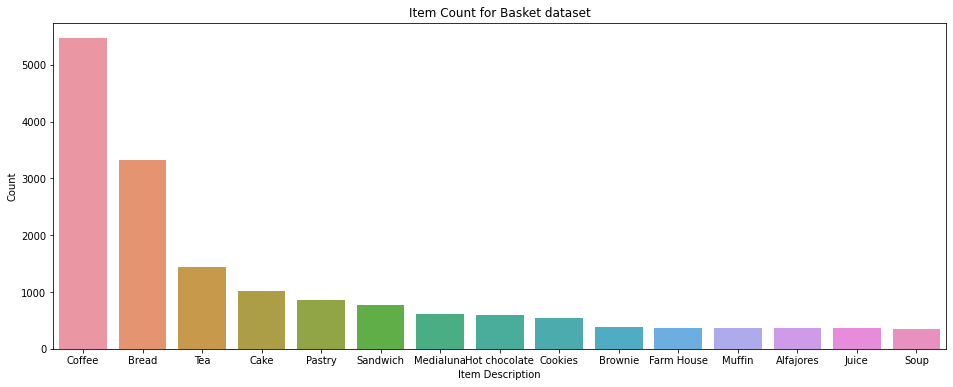

In [24]:
plt.figure(figsize=(16,6))
sns.barplot(x=itemsold_data.index[0:15],y=itemsold_data.Item[0:15],data=itemsold_data)
plt.xlabel('Item Description')
plt.ylabel('Count')
plt.title('Item Count for Basket dataset')
plt.show()
# sns.countplot()

In [25]:
# Yearly sales for Bread-Basket dataset
itemsold_year=data.groupby('Year')[['Transaction']].nunique()
itemsold_year

,Transaction
Year,
2016,3987
2017,5478


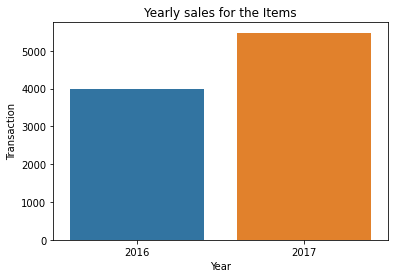

In [26]:
sns.barplot(x=itemsold_year.index,y='Transaction',data=itemsold_year)
plt.title("Yearly sales for the Items")
plt.show()

In [27]:
# Monthly sales for the items
itemsold_month=data[['Transaction','Month']].groupby('Month').count().sort_values('Transaction',axis=0,ascending=False)
itemsold_month

,Transaction
Month,
11,4436
3,3944
2,3906
1,3356
12,3339
4,1157
10,369


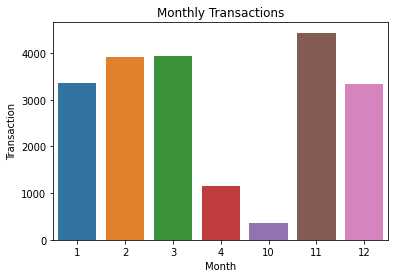

In [28]:
sns.barplot(x=itemsold_month.index,y='Transaction',data=itemsold_month)
plt.xlabel('Month')
plt.ylabel('Transaction')
plt.title('Monthly Transactions')
plt.show()

### From above data, in November(Month-11) Month, the sales occurred is more

## Market Basket Analysis- apriori algorithm for this Bread basket dataset

In [29]:
basket=data.groupby(['Item'])['Transaction'].sum().sort_values(ascending=False)
# basket=pd.DataFrame(basket,columns=['Transaction'])
basket=pd.DataFrame(basket)
basket

,Transaction
Item,
Coffee,27084057
Bread,16213533
Tea,7030856
Cake,5932362
Sandwich,4344466
...,...
Fairy Doors,1666
Bacon,1248
Adjustment,938


### Now we can find unique transactions happened for this bread basket dataset

In [31]:
n=data['Transaction'].nunique()
transactions=[]
for i in range(n):
    trans = list(set(data.loc[data['Transaction']==i,'Item']))
    if len(trans)>0:
        transactions.append(trans)

# transactions=np.array(transactions)
transactions[0:5]

[['Bread'],
 ['Scandinavian'],
 ['Jam', 'Hot chocolate', 'Cookies'],
 ['Muffin'],
 ['Bread', 'Pastry', 'Coffee']]

In [32]:
# By using transaction encoder we can view data in the transactions to find the support
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data1 = te.fit_transform(transactions)
data1 = pd.DataFrame(data1, columns = te.columns_)
data1.shape

(9256, 93)

In [33]:
data1

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9251,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9252,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9253,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9254,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
basket_model=data1.applymap(lambda x:1 if x==True else 0)
basket_model.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### implementing apriori algorithm- support

In [35]:
popular_sets=apriori(basket_model,min_support=0.08,use_colnames=True)
popular_sets

,support,itemsets
0,0.328220,(Bread)
1,0.103825,(Cake)
2,0.478933,(Coffee)
3,0.086755,(Pastry)
4,0.142718,(Tea)
5,0.090320,"(Bread, Coffee)"


In [36]:
# when having min_support=0.08, the itemsets are very few, so we can try with some less value of min_support
popular_sets=apriori(basket_model,min_support=0.05,use_colnames=True)
popular_sets

,support,itemsets
0,0.328220,(Bread)
1,0.103825,(Cake)
2,0.478933,(Coffee)
3,0.054451,(Cookies)
4,0.059205,(Hot chocolate)
5,0.062770,(Medialuna)
6,0.086755,(Pastry)
7,0.071089,(Sandwich)
8,0.142718,(Tea)
9,0.090320,"(Bread, Coffee)"


In [37]:
# when having min_support=0.05, the itemsets are also less, so we can try with some less value of min_support
popular_sets=apriori(basket_model,min_support=0.02,use_colnames=True)
popular_sets

,support,itemsets
0,0.035761,(Alfajores)
1,0.328220,(Bread)
2,0.040406,(Brownie)
3,0.103825,(Cake)
4,0.478933,(Coffee)
5,0.054451,(Cookies)
6,0.039434,(Farm House)
7,0.059205,(Hot chocolate)
8,0.037705,(Juice)
9,0.062770,(Medialuna)


In [38]:
rules=association_rules(popular_sets,metric='lift',min_threshold=1)

In [39]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Pastry),0.328220,0.086755,0.029278,0.089203,1.028228,0.000804,1.002689
1,(Pastry),(Bread),0.086755,0.328220,0.029278,0.337484,1.028228,0.000804,1.013984
2,(Cake),(Coffee),0.103825,0.478933,0.054775,0.527575,1.101565,0.005050,1.102964
3,(Coffee),(Cake),0.478933,0.103825,0.054775,0.114370,1.101565,0.005050,1.011907
4,(Cake),(Tea),0.103825,0.142718,0.023660,0.227888,1.596766,0.008843,1.110307
5,(Tea),(Cake),0.142718,0.103825,0.023660,0.165783,1.596766,0.008843,1.074272
6,(Coffee),(Cookies),0.478933,0.054451,0.028090,0.058651,1.077131,0.002011,1.004462
7,(Cookies),(Coffee),0.054451,0.478933,0.028090,0.515873,1.077131,0.002011,1.076303
8,(Hot chocolate),(Coffee),0.059205,0.478933,0.029927,0.505474,1.055419,0.001571,1.053671
9,(Coffee),(Hot chocolate),0.478933,0.059205,0.029927,0.062486,1.055419,0.001571,1.003500


In [40]:
rules.iloc[:].sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Cake),(Tea),0.103825,0.142718,0.023660,0.227888,1.596766,0.008843,1.110307
5,(Tea),(Cake),0.142718,0.103825,0.023660,0.165783,1.596766,0.008843,1.074272
18,(Toast),(Coffee),0.033276,0.478933,0.023228,0.698052,1.457516,0.007291,1.725686
19,(Coffee),(Toast),0.478933,0.033276,0.023228,0.048500,1.457516,0.007291,1.016000
13,(Coffee),(Medialuna),0.478933,0.062770,0.035545,0.074216,1.182348,0.005482,1.012364
12,(Medialuna),(Coffee),0.062770,0.478933,0.035545,0.566265,1.182348,0.005482,1.201350
15,(Coffee),(Pastry),0.478933,0.086755,0.047969,0.100158,1.154498,0.006419,1.014895
14,(Pastry),(Coffee),0.086755,0.478933,0.047969,0.552927,1.154498,0.006419,1.165507
11,(Coffee),(Juice),0.478933,0.037705,0.020419,0.042635,1.130738,0.002361,1.005149
10,(Juice),(Coffee),0.037705,0.478933,0.020419,0.541547,1.130738,0.002361,1.136578
